#Neural Network HW1 Part1
##Group 2
Saeed Samimi,
marjan Mohammadi,
Mohammd Ali Ahrabi

##Basic

In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Creating Data

a = 2.0
b = 3.0
n = 100

x = np.linspace(0, 10, n)
noise = np.random.normal(0, 2, n)
y = a * x + b + noise

plt.scatter(x, y, label='Data Points', color='blue')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [ ]:
#exporting data to use for all functions

data = data = list(zip(x, y))
data = pd.DataFrame(data)
data.to_csv('/content/drive/MyDrive/NN_HW1(data1).csv', index=False)

In [2]:
#importing data from google drive

data = pd.read_csv('/content/drive/MyDrive/NN_HW1(data1).csv')
x = data.iloc[:,0]
y = data.iloc[:,1]

##Stochastic Gradient Descent

Trained weight: [1.91890918]
Trained bias: [3.3460494]


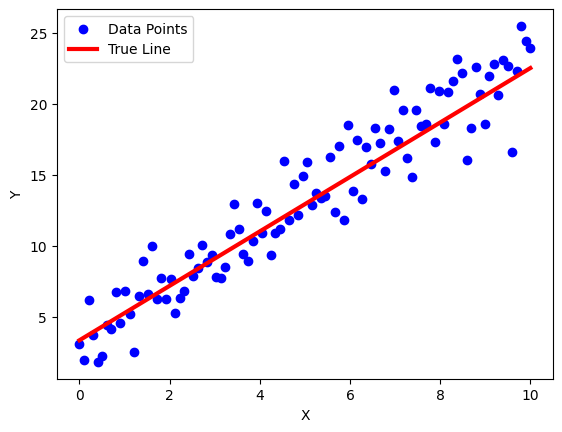

In [9]:
#Stohastic Gradient Descent

w = np.random.rand(1)
b = np.random.rand(1)

learning_rate = 0.01
epochs = 10000

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = w * x_i + b
    error = (y_i - y_pred)

    dw =  error * -1 * x_i
    db =  error * -1 * 1

    w = w - learning_rate * dw
    b = b - learning_rate * db

print("Trained weight:", w)
print("Trained bias:", b)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

##Momentum

Trained weight: [1.77296155]
Trained bias: [3.18958864]
Momentum MSE: 5.50039976383105


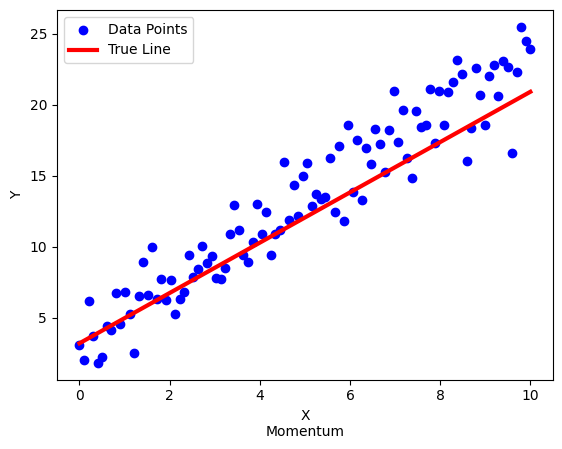

In [10]:
w = np.random.rand(1)
b = np.random.rand(1)

learning_rate = 0.01
epochs = 10000
v_w = 0
v_b = 0
beta = 0.9

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = w * x_i + b
    error = (y_i - y_pred)

    dw =  error * -1 * x_i
    db =  error * -1 * 1

    w = w - learning_rate * v_w
    b = b - learning_rate * v_b

    v_w = beta * v_w + (1-beta) * dw
    v_b = beta * v_b + (1-beta) * db

mse = np.mean((y - (w * x + b))**2)
print("Trained weight:", w)
print("Trained bias:", b)
print("Momentum MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nMomentum')
plt.ylabel('Y')

plt.legend()
plt.show()

##Nesterov Accelerated Gradient (NAG)

Trained weight: [2.06363562]
Trained bias: [2.92226482]
NAG MSE: 3.3321462221609317


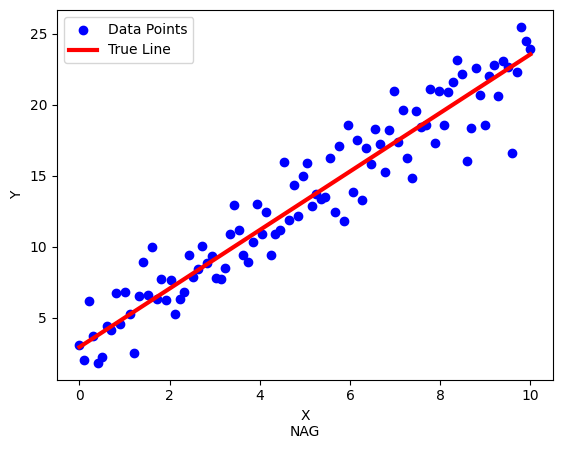

In [11]:
w = np.random.rand(1)
b = np.random.rand(1)

learning_rate = 0.01
epochs = 10000
v_w = 0
v_b = 0
beta = 0.9

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    w_star = w - learning_rate * v_w
    b_star = b - learning_rate * v_b

    y_pred = w_star * x_i + b_star
    error = (y_i - y_pred)

    dw =  error * -1 * x_i
    db =  error * -1 * 1

    v_w = beta * v_w + learning_rate * dw
    v_b = beta * v_b + learning_rate * db

    w -= learning_rate * v_w
    b -= learning_rate * v_b

mse = np.mean((y - (w * x + b))**2)
print("Trained weight:", w)
print("Trained bias:", b)
print("NAG MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nNAG')
plt.ylabel('Y')

plt.legend()
plt.show()

##AdaGrad

Trained weight: [2.03937899]
Trained bias: [1.41081436]
adaGrad MSE: 6.321358619936843


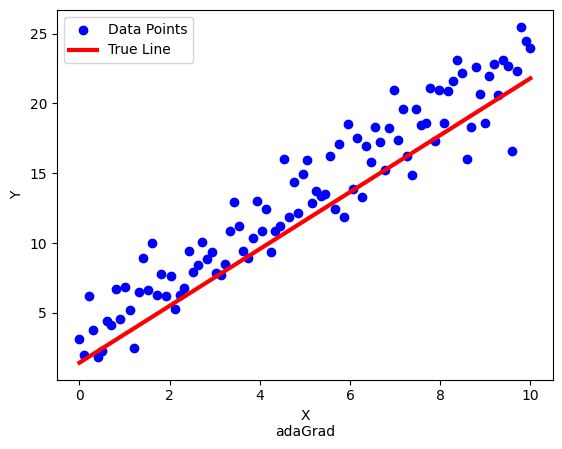

In [12]:
w = np.random.rand(1)
b = np.random.rand(1)

learning_rate = 0.01
epochs = 10000
epsilon = 1e-7
S_w = 0
S_b = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = w * x_i + b
    error = (y_i - y_pred)

    dw =  error * -1 * x_i
    db =  error * -1 * 1

    S_w += dw**2
    S_b += db**2

    w -= (learning_rate / (np.sqrt(S_w) + epsilon)) * dw
    b -= (learning_rate / (np.sqrt(S_b) + epsilon)) * db

mse = np.mean((y - (w * x + b))**2)
print("Trained weight:", w)
print("Trained bias:", b)
print("adaGrad MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nadaGrad')
plt.ylabel('Y')

plt.legend()
plt.show()

##RMSprop

Trained weight: [2.07430883]
Trained bias: [2.96372549]
RMSprop MSE: 3.3299957131603715


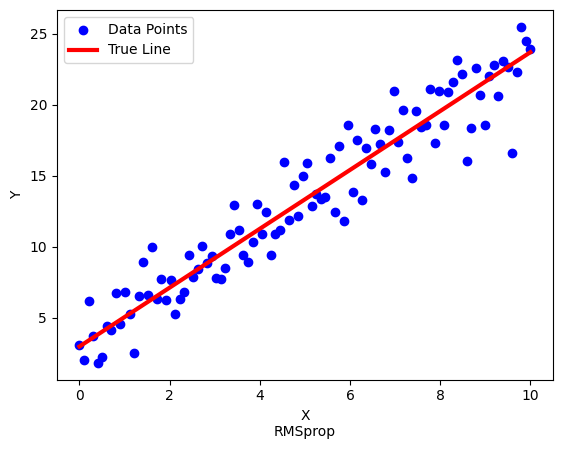

In [13]:
w = np.random.rand(1)
b = np.random.rand(1)

learning_rate = 0.01
epochs = 10000
epsilon = 1e-7
beta = 0.9
S_w = 0
S_b = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = w * x_i + b
    error = (y_i - y_pred)

    dw =  error * -1 * x_i
    db =  error * -1 * 1

    S_w = beta * S_w + (1 - beta) * (dw**2)
    S_b = beta * S_b + (1 - beta) * (db**2)

    w -= (learning_rate / (np.sqrt(S_w) + epsilon)) * dw
    b -= (learning_rate / (np.sqrt(S_b) + epsilon)) * db

mse = np.mean((y - (w * x + b))**2)
print("Trained weight:", w)
print("Trained bias:", b)
print("RMSprop MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nRMSprop')
plt.ylabel('Y')

plt.legend()
plt.show()

##Adadelta

Trained weight: [2.15247751]
Trained bias: [2.59094553]
adadelta MSE: 3.450010999640351


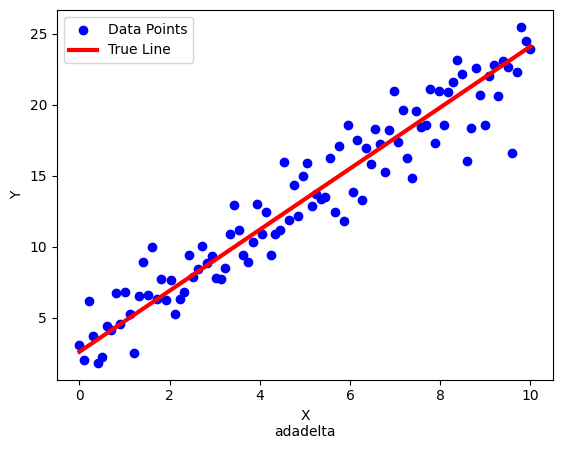

In [17]:
w = np.random.rand(1)
b = np.random.rand(1)

epochs = 10000
epsilon = 1e-6
beta = 0.95
S_dw = 0
S_db = 0
D_w = 0
D_b = 0
w_t = 0
b_t = 0
D_w_t = 0
D_b_t = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = w * x_i + b
    error = (y_i - y_pred)


    dw =  error * -1 * x_i
    db =  error * -1 * 1

    S_dw = beta * S_dw + (1 - beta) * (dw**2)
    S_db = beta * S_db + (1 - beta) * (db**2)

    delta_w = w - w_t
    delta_b = b - b_t

    D_w = beta * D_w_t + (1-beta) * (delta_w**2)
    D_b = beta * D_b_t + (1-beta) * (delta_b**2)

    D_w_t = D_w
    D_b_t = D_b

    w -= np.sqrt(D_w + epsilon) / np.sqrt(S_dw + epsilon) * dw
    b -= np.sqrt(D_b + epsilon) / np.sqrt(S_db + epsilon) * db

    w_t = w
    b_t = b


mse = np.mean((y - (w * x + b))**2)
print("Trained weight:", w)
print("Trained bias:", b)
print("adadelta MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nadadelta')
plt.ylabel('Y')

plt.legend()
plt.show()

##Adam


Trained weight: [2.02020309]
Trained bias: [3.245392]
adam MSE: 3.3077515487171785


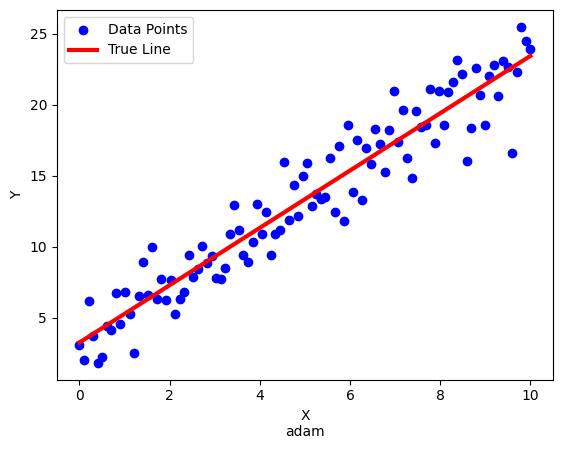

In [18]:
w = np.random.rand(1)
b = np.random.rand(1)

epochs = 10000
learning_rate = 0.01
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999
v_w = 0
v_b = 0
S_w = 1e-8
S_b = 1e-8
t = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = w * x_i + b
    error = (y_i - y_pred)

    dw =  error * -1 * x_i
    db =  error * -1 * 1

    t += 1

    v_w = beta1 * v_w + (1 - beta1) * dw
    v_b = beta1 * v_b + (1 - beta1) * db

    S_w = beta2 * S_w + (1 - beta2) * (dw**2)
    S_b = beta2 * S_b + (1 - beta2) * (db**2)

    v_w_hat = v_w / (1 - beta1**t)
    v_b_hat = v_b / (1 - beta1**t)

    S_w_hat = S_w / (1 - beta2**t)
    S_b_hat = S_b / (1 - beta2**t)

    w -= (learning_rate / (np.sqrt(S_w_hat) + epsilon)) * v_w_hat
    b -= (learning_rate / (np.sqrt(S_b_hat) + epsilon)) * v_b_hat

mse = np.mean((y - (w * x + b))**2)
print("Trained weight:", w)
print("Trained bias:", b)
print("adam MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nadam')
plt.ylabel('Y')

plt.legend()
plt.show()

##AdaMax

Trained weight: [2.02557887]
Trained bias: [3.11844529]
adamax MSE: 3.317073522977885


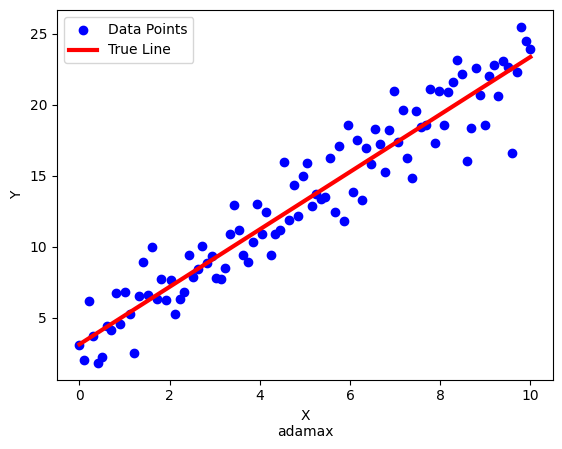

In [19]:
w = np.random.rand(1)
b = np.random.rand(1)

epochs = 10000
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999
v_w = 0
v_b = 0
S_w = 1e-8
S_b = 1e-8
t = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = w * x_i + b
    error = (y_i - y_pred)

    dw =  error * -1 * x_i
    db =  error * -1 * 1

    t += 1

    v_w = beta1 * v_w + (1 - beta1) * dw
    v_b = beta1 * v_b + (1 - beta1) * db

    S_w = max(beta2 * S_w, np.abs(dw))
    S_b = max(beta2 * S_b, np.abs(db))

    v_w_hat = v_w / (1 - beta1**t)
    v_b_hat = v_b / (1 - beta1**t)

    w -= (learning_rate / (S_w)) * v_w_hat
    b -= (learning_rate / (S_b)) * v_b_hat

mse = np.mean((y - (w * x + b))**2)
print("Trained weight:", w)
print("Trained bias:", b)
print("adamax MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nadamax')
plt.ylabel('Y')

plt.legend()
plt.show()

##Nadam

Trained weight: [1.6564999]
Trained bias: [5.32864548]
nadam MSE: 4.522317507491909


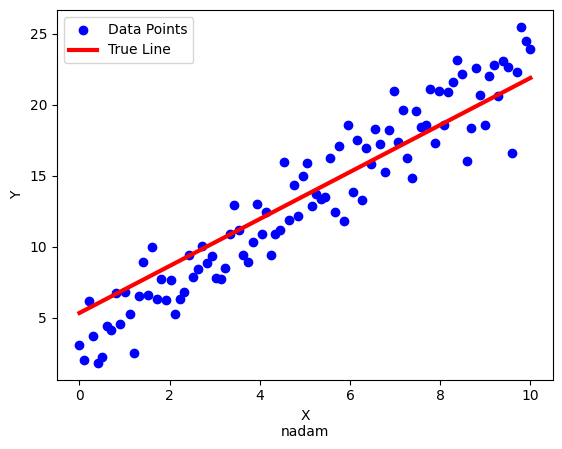

In [20]:
w = np.random.rand(1)
b = np.random.rand(1)

epochs = 10000
learning_rate = 0.01
epsilon = 1e-7
beta1 = 0.9
beta2 = 0.999
v_w = 0
v_b = 0
S_w = 0
S_b = 0
t = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = w * x_i + b
    error = (y_i - y_pred)

    dw =  error * -1 * x_i
    db =  error * -1 * 1

    t += 1

    v_w = beta1 * v_w + (1 - beta1) * dw
    v_b = beta1 * v_b + (1 - beta1) * db

    S_w = beta2 * S_w + (1 - beta2) * (dw**2)
    S_b = beta2 * S_b + (1 - beta2) * (db**2)

    v_w_hat = v_w / (1 - beta1**t)
    v_b_hat = v_b / (1 - beta1**t)

    S_w_hat = S_w / (1 - beta2**t)
    S_b_hat = S_b / (1 - beta2**t)

    w -= (learning_rate / (np.sqrt(S_w_hat) + epsilon)) * (beta1 * v_w_hat + ((1 - beta1)/(1 - beta1**t)) * dw)
    b -= (learning_rate / (np.sqrt(S_b_hat) + epsilon)) * (beta1 * v_w_hat + ((1 - beta1)/(1 - beta1**t)) * db)

mse = np.mean((y - (w * x + b))**2)
print("Trained weight:", w)
print("Trained bias:", b)
print("nadam MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nnadam')
plt.ylabel('Y')

plt.legend()
plt.show()

##AMSGrad

Trained weight: [1.96075488]
Trained bias: [3.16450446]
AMSGrad MSE: 3.4812073688137564


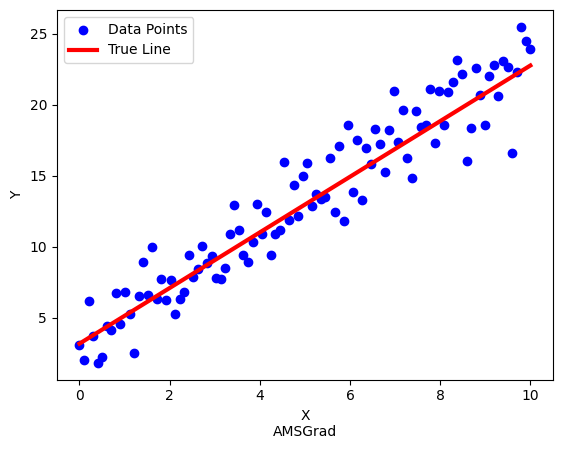

In [21]:
w = np.random.rand(1)
b = np.random.rand(1)

epochs = 10000
learning_rate = 0.01
epsilon = 1e-7
beta1 = 0.9
beta2 = 0.999
v_w = 0
v_b = 0
S_w = 0
S_w_hat = 0
S_b_hat = 0
S_b = 0
t = 0
for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = w * x_i + b
    error = (y_i - y_pred)



    dw =  error * -1 * x_i
    db =  error * -1 * 1

    t += 1

    v_w = beta1 * v_w + (1 - beta1) * dw
    v_b = beta1 * v_b + (1 - beta1) * db

    S_w = beta2 * S_w + (1 - beta2) * (dw**2)
    S_b = beta2 * S_b + (1 - beta2) * (db**2)

    S_w_hat  = max(S_w_hat, S_w)
    S_b_hat  = max(S_b_hat, S_b)

    w -= (learning_rate / (np.sqrt(S_w_hat) + epsilon)) * v_w
    b -= (learning_rate / (np.sqrt(S_b_hat) + epsilon)) * v_b

mse = np.mean((y - (w * x + b))**2)
print("Trained weight:", w)
print("Trained bias:", b)
print("AMSGrad MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = w * x + b
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nAMSGrad')
plt.ylabel('Y')

plt.legend()
plt.show()